## Creating Fake Data

In [5]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=5, random_state=11)

## Visualizing the Data

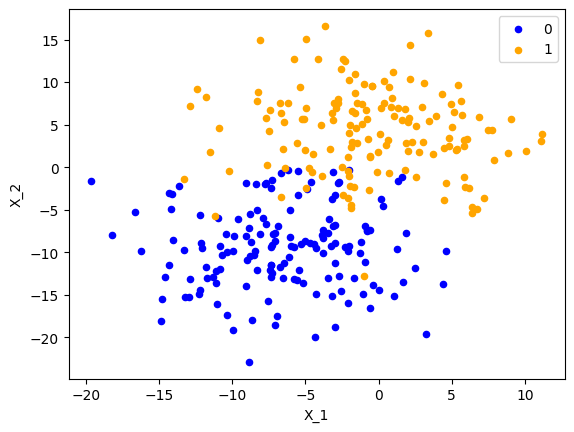

In [6]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

## Splitting into batches

In [7]:
def next_batch(X, Y, batch_size):
    for i in np.arange(0, X.shape[0], batch_size):
        yield (X[i:i + batch_size], Y[i:i + batch_size])

## Adding column of 1's 

In [8]:
X = np.c_[np.ones((X.shape[0])), X]
X.shape

(300, 3)

## Logistic Model

In [9]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def hx(W,X):
    return sigmoid(np.dot(X,W))

## Cost Function - Binary Cross Entropy 

In [11]:
def cost(W, X, Y):
    y_pred = hx(W,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

## Stochastic Gradient Descent

In [12]:
def grad(W, X, Y):
    y_pred = hx(W,X)
    A = (Y*(1-y_pred) - (1-Y)*y_pred)
    g = -1* np.dot(A.T,X)
    return g

In [13]:
def sgd(W_new, W_prev, lr, batch_size, epochs):
    X_, Y_ = shuffle(X, Y, random_state=0)
    for e in range(epochs):
        epoch_loss = []
        X_, Y_ = shuffle(X_, Y_, random_state=0)
        for (batchX, batchY) in next_batch(X_, Y_, batch_size):
            W_prev = W_new
            epoch_loss.append(cost(W_prev, batchX, batchY))
            gradients = grad(W_prev, batchX, batchY)
            W_new = W_prev - lr*gradients
        print(np.average(epoch_loss))
    return W_new

## Initializing Weights & Bias

In [14]:
W = np.random.uniform(size=(X.shape[1],))
W.shape

(3,)

## Training the Model

In [15]:
print(W)
W = sgd(W, W, .009, 32, 200)
print(W)

[0.60438712 0.9438995  0.02563984]
10.139782629705604
5.877204107712454
5.751397760120404
5.545966880805565
5.7325550994358965
5.3317366094968515
5.3126330529360235
5.087518801034255
5.476509038984082
5.0862855237197255
5.120415323568617
5.040928503127617
5.242768410206066
4.9996864705829696
5.05601984665284
5.124049361702288
5.250068827894738
5.337165159363618
5.245123254255333
4.935457077605703
5.144173953655011
4.869464376498385
5.16266571057478
4.986931513400752
5.078352989314741
5.260065538161424
5.15484275627027
5.3784631931492175
5.01916721561154
4.918576294885444
5.1564087985367175
4.77915614087604
5.171719444446799
4.982705587725647
5.066260241725171
5.130532092149055
5.056044082473994
4.7518825969849585
5.0448397882308615
5.200462711231134
5.286243283737334
4.696305317385892
5.111303566836876
4.929348934772191
5.509042935005879
4.9296254690889345
5.358485749421694
5.109957620850372
5.269084393855303
5.055466186694378
5.127183599004282
5.256276691073399
5.2017665560688995
5.29

## Visualizing the Result

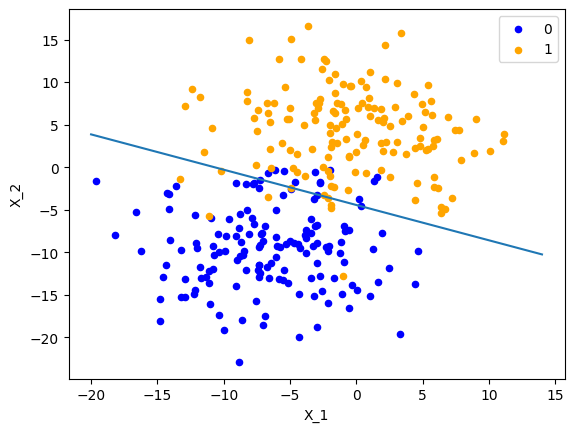

In [16]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-W[0]-W[1]*x)/W[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,1], y=X[:,2], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()